In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load dataset
df = pd.read_csv('Housing.csv')  
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
# Encode categorical variables (furnishingstatus)
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

In [5]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on test data
y_pred = model.predict(X_test)

In [9]:
# Evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1127483.3523235188
Mean Squared Error (MSE): 2292721545725.3623
R² Score: 0.5464062355495871


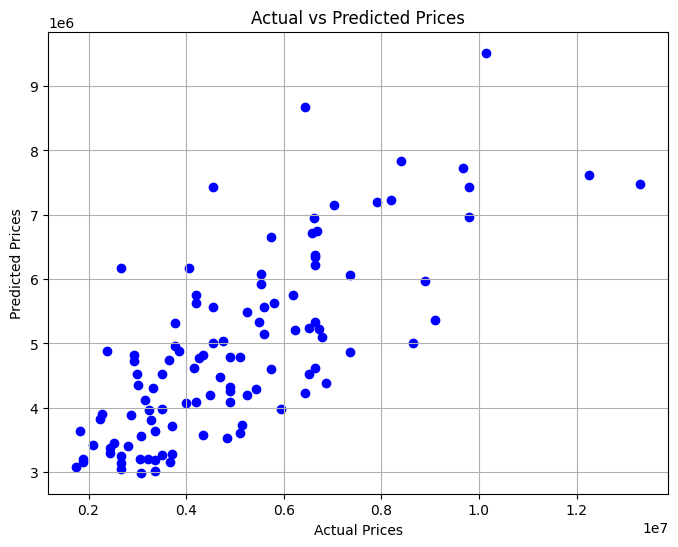

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

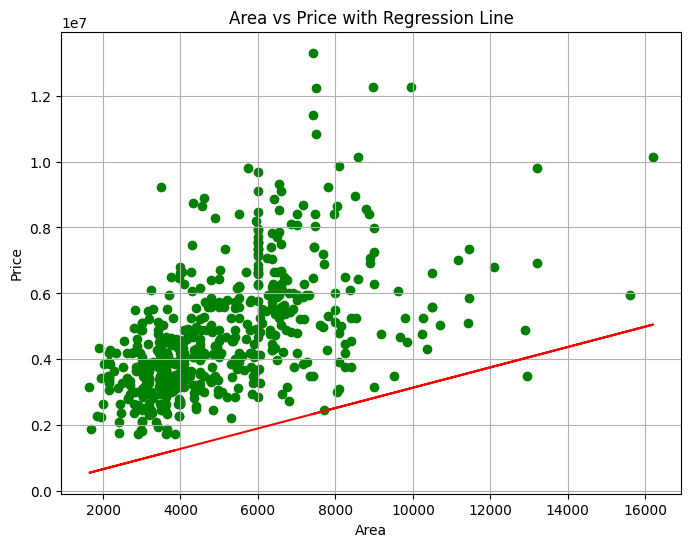

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X['area'], y, color='green')
plt.plot(X['area'], model.coef_[0]*X['area'] + model.intercept_, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price with Regression Line')
plt.grid(True)
plt.show()

In [12]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
area       3.088670e+02
bedrooms   1.512468e+05
bathrooms  1.185732e+06
stories    4.951008e+05
parking    3.376608e+05


In [13]:
# Interpretation of coefficients
for feature, coef in zip(X.columns, model.coef_):
    print(f"For each unit increase in {feature}, the price increases by approximately {coef:.2f} units.")

For each unit increase in area, the price increases by approximately 308.87 units.
For each unit increase in bedrooms, the price increases by approximately 151246.75 units.
For each unit increase in bathrooms, the price increases by approximately 1185731.71 units.
For each unit increase in stories, the price increases by approximately 495100.76 units.
For each unit increase in parking, the price increases by approximately 337660.83 units.
